<a href="https://colab.research.google.com/github/hanw/eodp-companion/blob/main/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To illustrate the concept of multivariate normal distributions using Python, especially focusing on the case with a diagonal covariance matrix, we can leverage the `numpy` and `scipy` libraries. These libraries provide efficient and straightforward means to handle multivariate normal distributions.

A diagonal covariance matrix implies that the variables are independent of each other, and the variance of each variable lies along the diagonal of the covariance matrix. This simplification allows us to model each dimension (variable) using independent normal distributions.

### Example: Multivariate Normal Distribution with Diagonal Covariance Matrix

Let's consider a simple example where $M = 3$, and we define a mean vector $\mu$ and a diagonal covariance matrix $\Sigma$, then sample from this distribution and calculate the expectation.


In this example:
- $\mu$ represents the mean of the distribution in each dimension.
- $\Sigma$ is a diagonal covariance matrix, indicating that the variables are independent and have variances specified by the diagonal elements.
- The distribution is sampled to generate points in $R^3$, and these samples are visualized.
- The expectation (sample mean) is calculated, which should approximate $\mu$, demonstrating the property $EY \sim p_\lambda[Y] = \mu$.

This Python code demonstrates working with multivariate normal distributions with diagonal covariance matrices, emphasizing the independence of each dimension and how to visualize and compute expectations for such distributions.

(1000, 3)


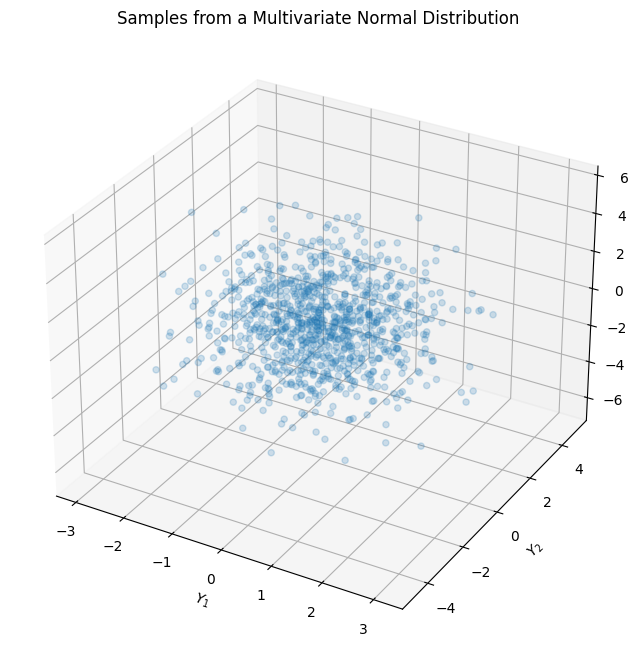

Expectation (Sample Mean): [-0.01530689 -0.00897306  0.02454442]


In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters: mean vector and diagonal covariance matrix
mu = np.array([0, 0, 0])  # Mean vector
sigma = np.array([1, 2, 3])  # Variances for the diagonal covariance matrix
Sigma = np.diag(sigma)  # Diagonal covariance matrix

# Multivariate normal distribution
dist = multivariate_normal(mean=mu, cov=Sigma)

# Sampling from the distribution
samples = dist.rvs(size=1000)
print(samples.shape)

# Plotting samples
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], alpha=0.2)
ax.set_title('Samples from a Multivariate Normal Distribution')
ax.set_xlabel('$Y_1$')
ax.set_ylabel('$Y_2$')
ax.set_zlabel('$Y_3$')
plt.show()

# Expectation of the distribution
expectation = np.mean(samples, axis=0)
print("Expectation (Sample Mean):", expectation)


To illustrate the concept of the log-partition function \(A(\theta)\) and how it can be computed for both discrete and continuous random variables using Python, let's focus on a discrete example and a hypothetical continuous example. We'll show how to implement the computation of \(A(\theta)\) using the `logsumexp` function from `scipy`, which is specifically designed to handle the numerical stability issues that arise when computing the logarithm of the sum of exponentials.

### Discrete Random Variables Example

Let's consider a simple case where \(Y = \{0, 1, 2\}\), and for demonstration purposes, let's define \(h(y) = 1\) for all \(y\) (which is often the case in exponential family distributions when there is no base measure affecting the outcomes), and \(\phi(y)\) as some feature function of \(y\).


In [2]:
import numpy as np
from scipy.special import logsumexp

# Define the feature function φ(y) and θ
phi = lambda y: np.array([y, y**2])  # Example feature function
theta = np.array([0.5, -0.2])  # Parameter vector

# Define B(θ) for discrete Y
Y = np.array([0, 1, 2])
B_theta = np.array([np.dot(theta, phi(y)) for y in Y])

# Compute A(θ) for discrete Y
A_theta_discrete = logsumexp(B_theta)
print("A(θ) for discrete random variables:", A_theta_discrete)

A(θ) for discrete random variables: 1.2729189131256584



### Continuous Random Variables Example

For continuous variables, the computation involves an integral instead of a sum. Let's hypothetically consider a scenario where \(Y\) spans some continuous range, and \(h(y)\) and \(\phi(y)\) are defined such that the integral can be computed or approximated.

For this demonstration, we'll assume a simple case and approximate the integral using numerical integration methods for a bounded range of \(Y\), knowing that in practice, \(Y\) might be unbounded and the choice of \(h(y)\) and \(\phi(y)\) would affect the feasibility of this approach.


These examples demonstrate the computation of the log-partition function \(A(\theta)\) for both discrete and continuous random variables. For the continuous case, the approach would depend significantly on the choice of \(h(y)\) and \(\phi(y)\), and in many practical scenarios, additional techniques may be required to compute or approximate \(A(\theta)\) accurately.

In [3]:
from scipy.integrate import quad

# Define a hypothetical h(y) and φ(y) for continuous Y
h = lambda y: np.exp(-y**2)  # Hypothetical h(y)
phi_continuous = lambda y: np.array([y, np.sin(y)])  # Hypothetical feature function

# Integrand for A(θ) computation
def integrand(y, theta):
    return np.exp(np.dot(theta, phi_continuous(y))) * h(y)

# Approximate A(θ) for continuous Y over a bounded range [-3, 3]
theta_continuous = np.array([0.1, 0.5])  # Example theta for continuous case
result, _ = quad(lambda y: integrand(y, theta_continuous), -3, 3)
A_theta_continuous = np.log(result)
print("A(θ) for continuous random variables (approximation):", A_theta_continuous)

A(θ) for continuous random variables (approximation): 0.6332294449962315


### 3.4.3 Maximum entropy principle

The principle of maximum entropy is a powerful tool for selecting a probability distribution that maximizes uncertainty (entropy) subject to certain constraints, such as matching the empirical mean of observed data. For a set of observations, when the goal is to find a distribution whose expected value of some function (sufficient statistics) \(\phi(Y)\) equals the empirical mean \(\bar{\mu}\), the maximum entropy principle guides us towards the exponential family of distributions.

#### Example: Discrete Distribution with First-Order Moment Constraint

Let's consider a simplified example where we aim to find a maximum entropy distribution over a discrete variable \(Y\) with outcomes \(\{0, 1, 2\}\), subject to the constraint that its expected value matches an empirical mean. For simplicity, we use the identity function for \(\phi(y) = y\), implying we're matching the mean of the distribution.

The maximum entropy distribution satisfying this constraint is in the exponential family, and it can be represented as:
\[p^*(y) = \exp(\theta y - A(\theta))\]
where \(\theta\) is the parameter to be determined and \(A(\theta)\) is the log-partition function ensuring normalization.

#### Python Implementation for a Discrete Case

This script sets up and solves the problem of finding the maximum entropy distribution for a simple discrete case. It uses the `minimize` function from `scipy.optimize` to find the value of \(\theta\) that maximizes entropy, subject to the constraint that the expected value of \(Y\) under the distribution equals the empirical mean \(\bar{\mu}\). The approach demonstrates how constraints in a maximum entropy problem can lead to a distribution in the exponential family, where the canonical parameter \(\theta\) effectively becomes a Lagrange multiplier facilitating the constraint.

In [4]:
import numpy as np
from scipy.optimize import minimize
from scipy.special import logsumexp

# Empirical mean
b_mu = 1.5  # For example, matching the mean of {0, 1, 2}

# Possible outcomes of Y
Y = np.array([0, 1, 2])

# Objective function: Negative of Shannon entropy
def neg_shannon_entropy(theta):
    # Probabilities under the current theta
    log_probs = theta * Y - logsumexp(theta * Y)
    probs = np.exp(log_probs)
    
    # Shannon entropy
    entropy = -np.sum(probs * log_probs)
    
    return -entropy  # Negative because we minimize in scipy.optimize

# Constraint: Expected value matches empirical mean
def moment_constraint(theta):
    log_probs = theta * Y - logsumexp(theta * Y)
    probs = np.exp(log_probs)
    
    expected_value = np.sum(probs * Y)
    return expected_value - b_mu

# Optimization
result = minimize(neg_shannon_entropy, x0=np.array([0.0]),  # Initial guess
                  constraints={'type': 'eq', 'fun': moment_constraint})

# Optimal theta
theta_star = result.x[0]
print("Optimal theta:", theta_star)

# Maximum entropy probabilities
log_probs_star = theta_star * Y - logsumexp(theta_star * Y)
probs_star = np.exp(log_probs_star)
print("Maximum entropy probabilities:", probs_star)

Optimal theta: 0.8341151943508782
Maximum entropy probabilities: [0.11620406 0.26759188 0.61620406]


In this chapter, we started by reviewing discrete and continuous
probability distributions. We saw how to fit distribution parameters to
data using the maximum likelihood estimation (MLE) principle and
saw its connection with the Kullback-Leibler divergence. Instead of
designing a model function from the input space X to the output space
Y, we saw that we can perform probabilistic supervised learning
by designing a model function from X to distribution parameters Λ.
Leveraging the so-obtained parametric conditional distribution then
allowed us to compute, not only output probabilities, but also various
statistics such as the mean and the variance of the outputs. Finally,
we reviewed the exponential family, a principled generalization of
numerous distributions, which we saw is tightly connected with the
maximum entropy principle. Importantly, the approaches described
in this chapter produce perfectly valid computation graphs, meaning
that we can combine them with neural networks and we can use
automatic differentiation, to compute their derivatives.